# Table of Contents
- I. [Data Preparation](#I.-Data-Preparation)
- II. [Data Exploration](#II.-Data-Exploration)
    - a. [Plotting Heatmaps](#a.-Plotting-Heatmaps)
    - b. [Hypothesis Testing](#b.-Hypothesis-Testing)
    - c. [Comparing Community Area Statistics](#c.-Comparing-Community-Area-Statistics)
    - d. [Data Exploration Conclusions](#d.-Data-Exploration-Conclusions)

___

In [64]:
# Load libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn
import matplotlib.pyplot as pplt
import scipy.stats as st
import numpy as np
import plotly as pl
import geopandas as gpd
import shapefile as sf
from shapely.geometry import shape, Point
import plotly.figure_factory as ff

# I. Data Preparation
[Back to Top](#Table-of-Contents)

In [2]:
# Load public health statistics dataset
public_indicators = pd.read_csv('datasets/public_health_indicators.csv')
original_public_indicators = pd.read_csv('datasets/public_health_indicators.csv')
public_indicators.head(5)

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [3]:
# Capitalize community area names in public health indicators dataset
public_indicators['Community Area Name'] = public_indicators['Community Area Name'].apply(lambda x: x.upper())
public_indicators.head(5)

,Community Area,Community Area Name,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,1,ROGERS PARK,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,WEST RIDGE,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,...,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,UPTOWN,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,...,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,LINCOLN SQUARE,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,NORTH CENTER,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,...,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5


In [4]:
# Load shootings dataset
shootings = pd.read_csv('datasets/Shootings.csv')
original_shootings = pd.read_csv('datasets/Shootings.csv')

# Extract shootings between the years 2005-2011
shootings['Year'] = pd.DatetimeIndex(shootings['Date']).year
shootings = shootings.loc[(shootings['Year'] >= 2005) & (shootings['Year'] <= 2011)]
shootings = shootings.reset_index()
shootings.head(5)

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,39,6400477,HP485201,07/31/2008 04:30:00 AM,078XX S UNION AVE,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,621,17.0,04B,NaN,NaN,2008,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,684,6491809,HP555378,09/05/2008 08:30:00 PM,028XX W POLK ST,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,True,...,1135,28.0,04B,1157471.0,1896242.0,2008,04/13/2020 03:52:52 PM,41.871049,-87.697337,"(41.871049071, -87.697336573)"
2,20511,3730597,HL100084,01/01/2005 12:40:35 AM,092XX S UNIVERSITY AVE,0488,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDGUN,RESIDENCE,False,...,413,8.0,04B,1185489.0,1844037.0,2005,02/28/2018 03:56:25 PM,41.727179,-87.596117,"(41.727178835, -87.596117346)"
3,20512,3730814,HL100526,01/01/2005 05:05:00 AM,013XX S AVERS AVE,0488,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDGUN,APARTMENT,True,...,1011,24.0,04B,1150922.0,1893602.0,2005,02/28/2018 03:56:25 PM,41.863935,-87.721450,"(41.863935243, -87.721449563)"
4,20513,3730863,HL100552,01/01/2005 05:35:00 AM,023XX S HOMAN AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,1024,22.0,04B,1154068.0,1888193.0,2005,02/28/2018 03:56:25 PM,41.849030,-87.710045,"(41.849030217, -87.710044807)"


In [5]:
# Extract community areas boundaries from geospatial data
community_areas_boundaries = gpd.GeoDataFrame.from_file("shapefile/boundaries/boundaries.geojson")
community_areas_boundaries.head(4)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."


In [6]:
# Map coordinates of shootings to community areas

def check_comm_area(lat, long):
    for ind in community_areas_boundaries.index:
        polygon = shape(community_areas_boundaries['geometry'][ind])
        point = Point(long, lat)
        if polygon.contains(point):
            return community_areas_boundaries['community'][ind]

community_areas = []

for ind in shootings.index:    
    community_areas.append(check_comm_area(shootings['Latitude'][ind], shootings['Longitude'][ind]))

In [7]:
# Add community areas to shootings dataset

shootings['Community Area'] = community_areas  
shootings.head(5)

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Community Area
0,39,6400477,HP485201,07/31/2008 04:30:00 AM,078XX S UNION AVE,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,17.0,04B,NaN,NaN,2008,08/17/2015 03:03:40 PM,NaN,NaN,NaN,None
1,684,6491809,HP555378,09/05/2008 08:30:00 PM,028XX W POLK ST,041A,BATTERY,AGGRAVATED - HANDGUN,SIDEWALK,True,...,28.0,04B,1157471.0,1896242.0,2008,04/13/2020 03:52:52 PM,41.871049,-87.697337,"(41.871049071, -87.697336573)",EAST GARFIELD PARK
2,20511,3730597,HL100084,01/01/2005 12:40:35 AM,092XX S UNIVERSITY AVE,0488,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDGUN,RESIDENCE,False,...,8.0,04B,1185489.0,1844037.0,2005,02/28/2018 03:56:25 PM,41.727179,-87.596117,"(41.727178835, -87.596117346)",BURNSIDE
3,20512,3730814,HL100526,01/01/2005 05:05:00 AM,013XX S AVERS AVE,0488,BATTERY,AGGRAVATED DOMESTIC BATTERY: HANDGUN,APARTMENT,True,...,24.0,04B,1150922.0,1893602.0,2005,02/28/2018 03:56:25 PM,41.863935,-87.721450,"(41.863935243, -87.721449563)",NORTH LAWNDALE
4,20513,3730863,HL100552,01/01/2005 05:35:00 AM,023XX S HOMAN AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,22.0,04B,1154068.0,1888193.0,2005,02/28/2018 03:56:25 PM,41.849030,-87.710045,"(41.849030217, -87.710044807)",SOUTH LAWNDALE


In [8]:
# Group shootings dataset by community area to determine the total number of shootings per community area from 2005-2011

shootings = shootings.groupby('Community Area').size().reset_index()
shootings.head(77)

,Community Area,0
0,ALBANY PARK,63
1,ARCHER HEIGHTS,22
2,ARMOUR SQUARE,13
3,ASHBURN,107
4,AUBURN GRESHAM,473
...,...,...
69,WEST LAWN,35
70,WEST PULLMAN,381
71,WEST RIDGE,25
72,WEST TOWN,225


In [9]:
# Rename columns in the resulting dataset

shootings.columns = ['community', 'Total Shootings']
shootings.head(74)

,community,Total Shootings
0,ALBANY PARK,63
1,ARCHER HEIGHTS,22
2,ARMOUR SQUARE,13
3,ASHBURN,107
4,AUBURN GRESHAM,473
...,...,...
69,WEST LAWN,35
70,WEST PULLMAN,381
71,WEST RIDGE,25
72,WEST TOWN,225


In [10]:
# Merge community area table with shootings table

community_areas_shootings = pd.merge(community_areas_boundaries, shootings, how = 'inner', on = ['community'])
community_areas_shootings.head(5)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,Total Shootings
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",108
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",25
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",53
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",237
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",38


In [11]:
# Merge community area shootings table with public indicators table

public_indicators.rename(columns = {'Community Area Name':'community'}, inplace = True)

merged = pd.merge(community_areas_shootings, public_indicators, how = 'inner', on = ['community'])
merged.head(10)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,...,Childhood Lead Poisoning,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",...,0.0,1063.3,727.4,4.2,26.1,1.6,31.0,16.9,23098,16.7
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",...,0.3,1655.4,1629.3,6.7,38.1,3.5,40.5,17.6,19312,26.6
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",...,2.5,1061.9,1556.4,0.0,55.5,4.5,38.2,33.7,9016,40.0
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",...,1.0,1454.6,1680,13.2,28.3,2.7,41.7,19.4,22056,20.6
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",...,0.4,610.2,549.1,0.0,23.1,2.3,34.2,10.8,37519,11.0
5,LINCOLN SQUARE,0,71352328.2399,0,4,4,0,0,36624.6030848,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",...,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
6,WASHINGTON PARK,0,42373881.4842,0,40,40,0,0,28175.3160866,"MULTIPOLYGON (((-87.60604 41.78587, -87.60627 ...",...,0.4,2145.8,2058,5.0,39.1,4.9,40.9,28.3,13087,23.2
7,HYDE PARK,0,45105380.1732,0,41,41,0,0,29746.7082016,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ...",...,0.0,216.6,168.4,5.3,18.2,2.5,26.7,5.3,39243,6.9
8,WOODLAWN,0,57815179.512,0,42,42,0,0,46936.9592443,"MULTIPOLYGON (((-87.57714 41.78615, -87.57714 ...",...,1.6,1382.0,1818.6,17.4,28.3,1.8,37.6,17.9,18928,17.3
9,ROGERS PARK,0,51259902.4506,0,1,1,0,0,34052.3975757,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",...,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5


In [12]:
# Drop irrelevant/bias columns

merged = merged.drop(['Assault (Homicide)', 'Firearm-related'], axis=1)
merged.head(10)

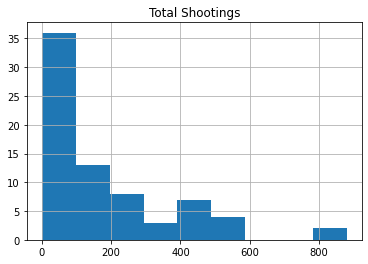

In [126]:
# Plot the distribution of the total shootings

hist = merged.hist(column="Total Shootings", bins=9)

<AxesSubplot:ylabel='Density'>

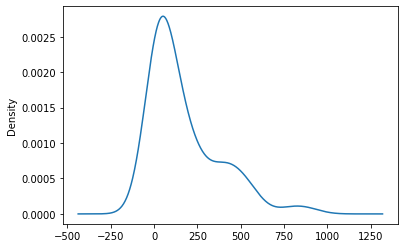

In [122]:
# Plot Density 

merged['Total Shootings'].plot.kde()

In [13]:
# Add a risk-classification based on total shootings 

def risk(total_shootings):
    if total_shootings < 100:
        return "Lowest"
    elif total_shootings >= 100 and total_shootings < 200:
        return "Very Low"
    elif total_shootings >= 200 and total_shootings < 300:
        return "Low"
    elif total_shootings >= 300 and total_shootings < 400:
        return "Moderately Low"
    elif total_shootings >= 400 and total_shootings < 500:
        return "Moderate"
    elif total_shootings >= 500 and total_shootings < 600:
        return "Moderately High"
    elif total_shootings >= 600 and total_shootings < 700:
        return "High"
    elif total_shootings >= 700 and total_shootings < 800:
        return "Very High"
    elif total_shootings >= 800:
        return "Highest"
    else:
        return "Unknown"
    
risk_classifications = []

for ind in merged.index:
    risk_classifications.append(risk(merged['Total Shootings'][ind]))
    
merged['Risk'] = risk_classifications
merged.head(10)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,...,Gonorrhea in Females,Gonorrhea in Males,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,Risk
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",...,1063.3,727.4,4.2,26.1,1.6,31.0,16.9,23098,16.7,Very Low
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",...,1655.4,1629.3,6.7,38.1,3.5,40.5,17.6,19312,26.6,Lowest
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",...,1061.9,1556.4,0.0,55.5,4.5,38.2,33.7,9016,40.0,Lowest
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",...,1454.6,1680,13.2,28.3,2.7,41.7,19.4,22056,20.6,Low
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",...,610.2,549.1,0.0,23.1,2.3,34.2,10.8,37519,11.0,Lowest
5,LINCOLN SQUARE,0,71352328.2399,0,4,4,0,0,36624.6030848,"MULTIPOLYGON (((-87.67441 41.97610, -87.67440 ...",...,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8,Lowest
6,WASHINGTON PARK,0,42373881.4842,0,40,40,0,0,28175.3160866,"MULTIPOLYGON (((-87.60604 41.78587, -87.60627 ...",...,2145.8,2058,5.0,39.1,4.9,40.9,28.3,13087,23.2,Low
7,HYDE PARK,0,45105380.1732,0,41,41,0,0,29746.7082016,"MULTIPOLYGON (((-87.58038 41.80253, -87.58040 ...",...,216.6,168.4,5.3,18.2,2.5,26.7,5.3,39243,6.9,Lowest
8,WOODLAWN,0,57815179.512,0,42,42,0,0,46936.9592443,"MULTIPOLYGON (((-87.57714 41.78615, -87.57714 ...",...,1382.0,1818.6,17.4,28.3,1.8,37.6,17.9,18928,17.3,Moderate
9,ROGERS PARK,0,51259902.4506,0,1,1,0,0,34052.3975757,"MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...",...,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5,Very Low


In [118]:
merged.describe()

,Total Shootings,Community Area,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,72.000000,72.000000,65.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,171.986301,39.561644,15.816438,68.394521,10.280822,76.712329,11.379452,51.608219,18.819178,26.152055,...,395.673611,0.891667,894.287692,7.036986,20.945205,5.050685,35.893151,22.036986,24694.712329,13.643836
std,199.185041,21.913965,3.518878,15.510497,3.915697,5.221003,2.987797,27.508230,16.672346,9.679304,...,113.265189,0.779265,894.921927,4.617223,11.432034,3.677413,7.364731,12.373162,15139.410685,7.045093
min,1.000000,1.000000,9.400000,27.700000,4.500000,63.600000,5.500000,1.300000,0.700000,7.600000,...,133.600000,0.000000,50.300000,0.000000,3.100000,0.200000,15.500000,2.900000,8535.000000,4.200000
25%,22.000000,22.000000,13.100000,60.100000,7.300000,73.300000,8.800000,34.200000,5.000000,20.200000,...,317.125000,0.375000,141.400000,3.500000,12.300000,2.300000,32.300000,13.500000,15411.000000,8.100000
50%,99.000000,40.000000,15.700000,68.300000,9.000000,75.900000,10.900000,50.300000,11.100000,24.000000,...,395.700000,0.750000,529.000000,6.700000,18.700000,4.400000,38.300000,18.600000,20320.000000,11.800000
75%,239.000000,58.000000,18.800000,80.700000,12.900000,80.300000,13.800000,68.200000,33.000000,32.900000,...,490.000000,1.200000,1512.000000,9.700000,27.000000,6.900000,40.900000,30.300000,27280.000000,17.700000
max,879.000000,77.000000,22.400000,94.900000,19.700000,94.500000,17.500000,116.900000,70.300000,54.700000,...,605.900000,3.700000,3193.300000,22.700000,61.400000,17.600000,50.200000,58.700000,87163.000000,40.000000


# II. Data Exploration
[Back to Top](#Table-of-Contents)

## a. Plotting Heatmaps
[Back to Top](#Table-of-Contents)

### Task: Plot Total Shootings Map
Plot a heatmap of the community areas based on the total number of shootings from 2005-2011

Text(634.9450000000002, 0.5, 'Total Shootings by Community Area\n 2005-2011')

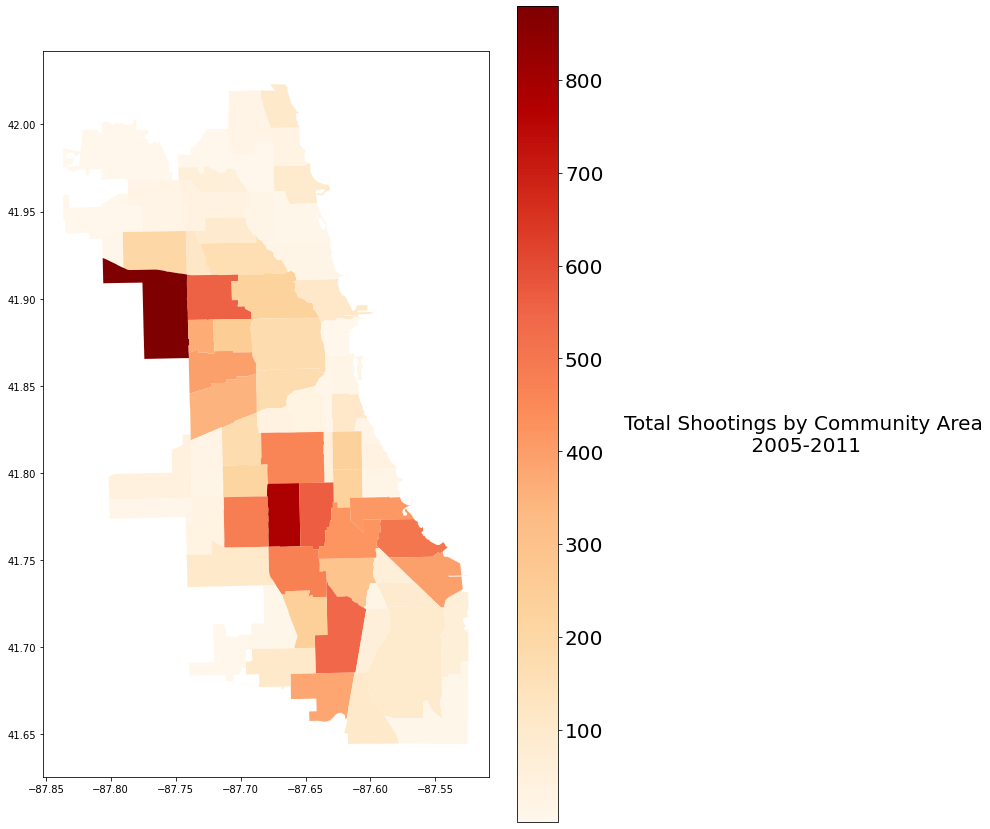

In [65]:
plt = community_areas_shootings.plot(column='Total Shootings', legend=True, legend_kwds={'label': "Total Shootings by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='OrRd')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Total Shootings by Community Area\n 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Income Map
Plot a heatmap of the community areas based on per capita income from 2005-2011

Text(647.4450000000002, 0.5, 'Per Capita Income by Community Area\n 2005-2011')

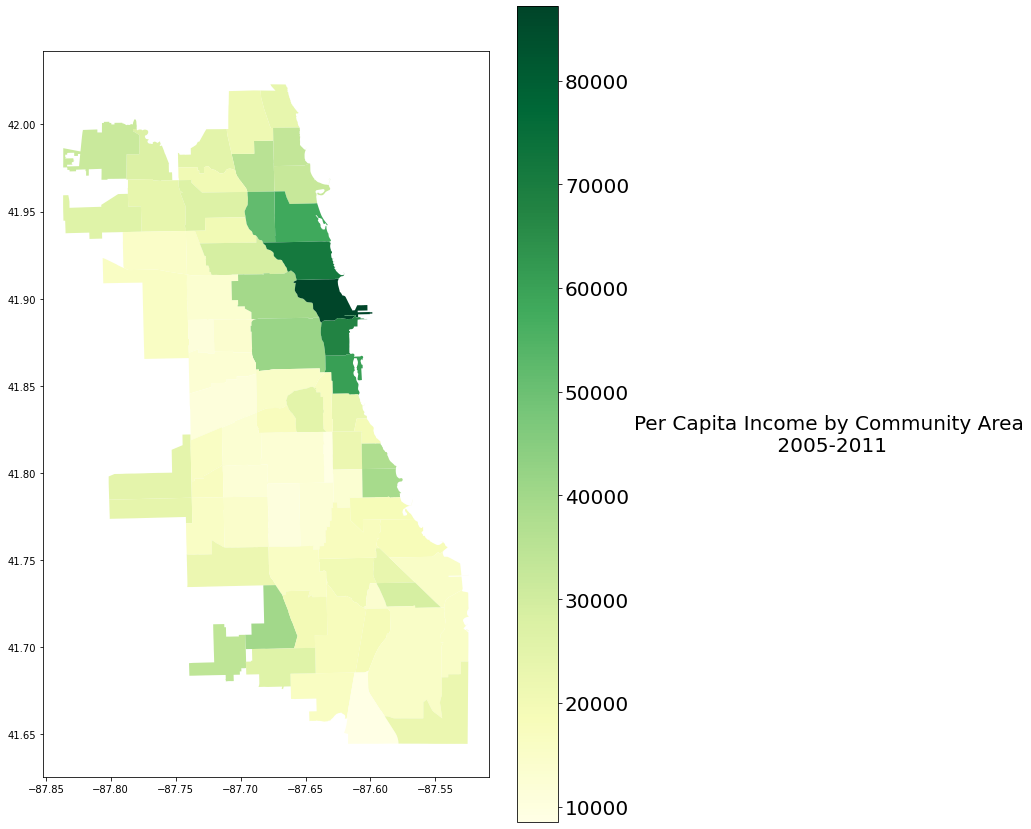

In [22]:
plt = merged.plot(column='Per Capita Income', legend=True, legend_kwds={'label': "Per Capita Income by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='OrRd')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Per Capita Income by Community Area\n 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Unemployment Map
Plot a heatmap of the community areas based on unemployment from 2005-2011

Text(628.8200000000002, 0.5, 'Unemployment by Community Area\n 2005-2011')

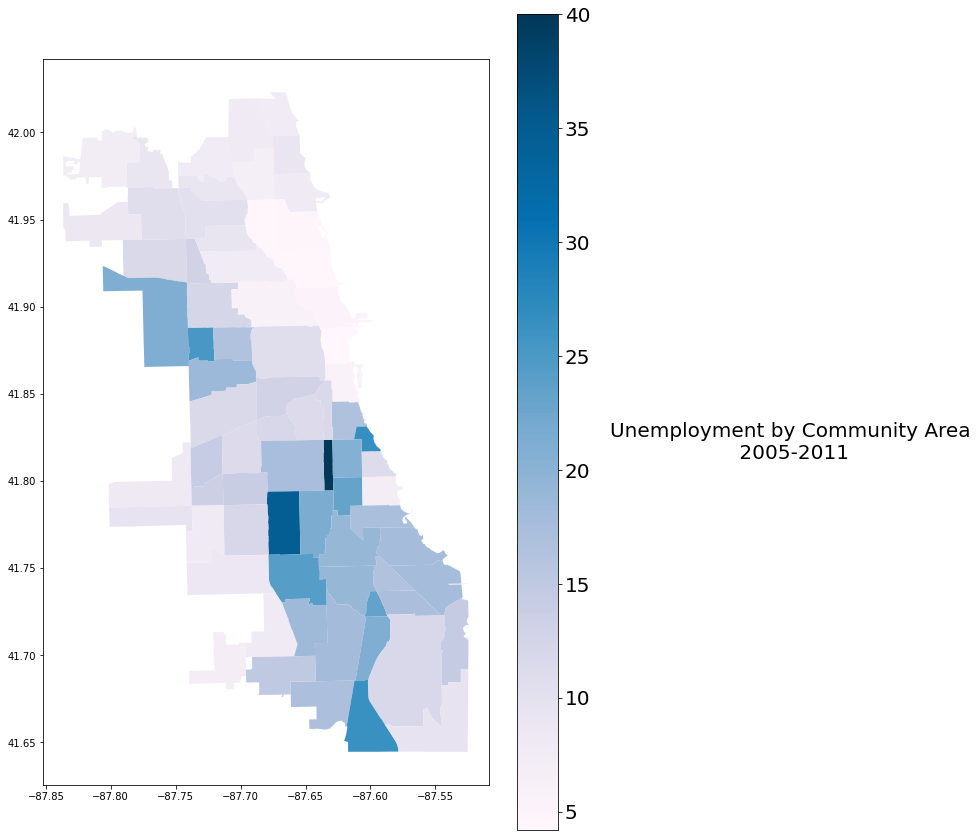

In [23]:
plt = merged.plot(column='Unemployment', legend=True, legend_kwds={'label': "Unemployment by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='PuBu')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Unemployment by Community Area\n 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Below Poverty Level Map
Plot a heatmap of the community areas based on the percent of households below the poverty level from 2005-2011

Text(628.6950000000002, 0.5, 'Households Below Poverty Level (%)\n by Community Area 2005-2011')

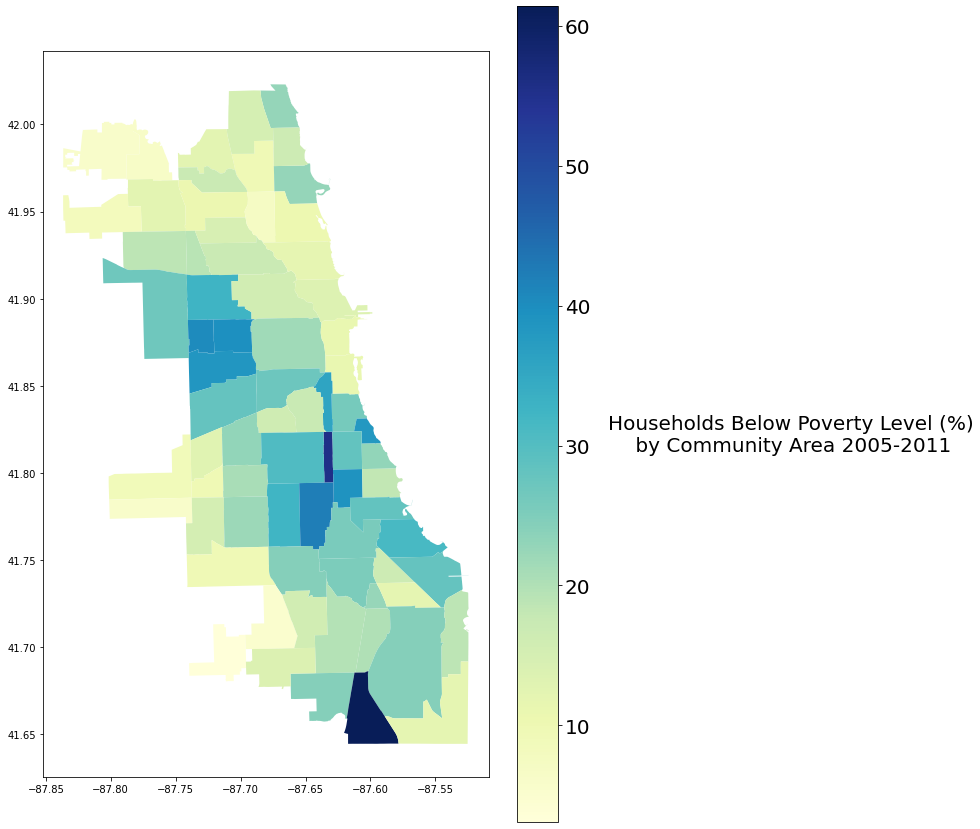

In [31]:
plt = merged.plot(column='Below Poverty Level', legend=True, legend_kwds={'label': "Households Below Poverty Level (%) by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='YlGnBu')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Households Below Poverty Level (%)\n by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot No High School Diploma Map
Plot a heatmap of the community areas based on the percent of persons aged 25 years and older with no high school diploma from 2005-2011

Text(628.6950000000002, 0.5, 'No High School Diploma (%)\n by Community Area 2005-2011')

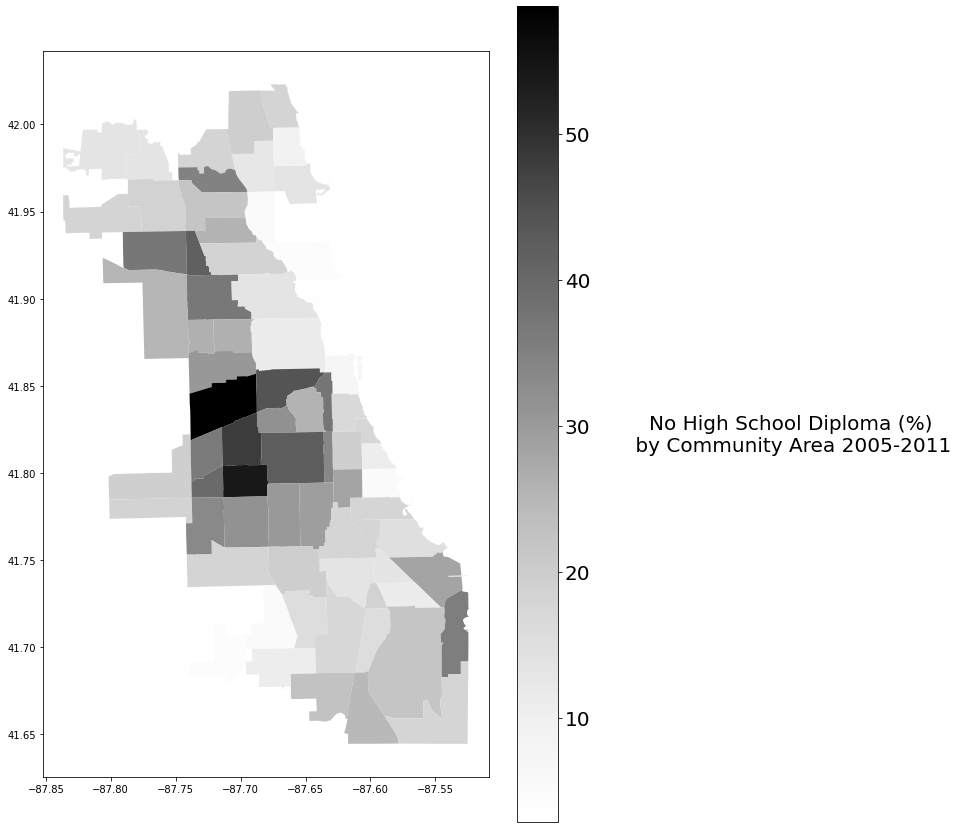

In [37]:
plt = merged.plot(column='No High School Diploma', legend=True, legend_kwds={'label': "No High School Diploma (%) by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Greys')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("No High School Diploma (%)\n by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Dependency Map
Plot a heatmap of the community areas based on the percent of persons aged less than 16 or more than 64 years  from 2005-2011

Text(628.8200000000002, 0.5, 'Dependents (%)\n by Community Area 2005-2011')

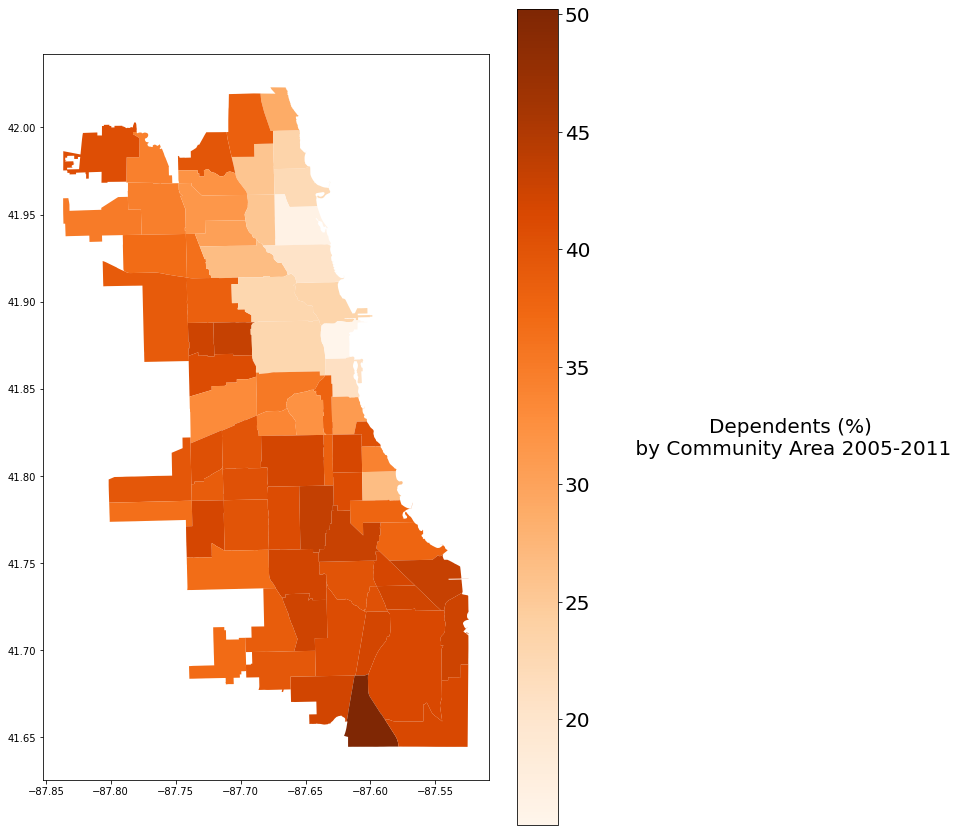

In [40]:
plt = merged.plot(column='Dependency', legend=True, legend_kwds={'label': "Dependents (%) by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Oranges')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Dependents (%)\n by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Crowded Housing Map
Plot a heatmap of the community areas based on the percent of occupied housing units that were crowded from 2005-2011

Text(628.8200000000002, 0.5, 'Crowded Housing (%)\n by Community Area 2005-2011')

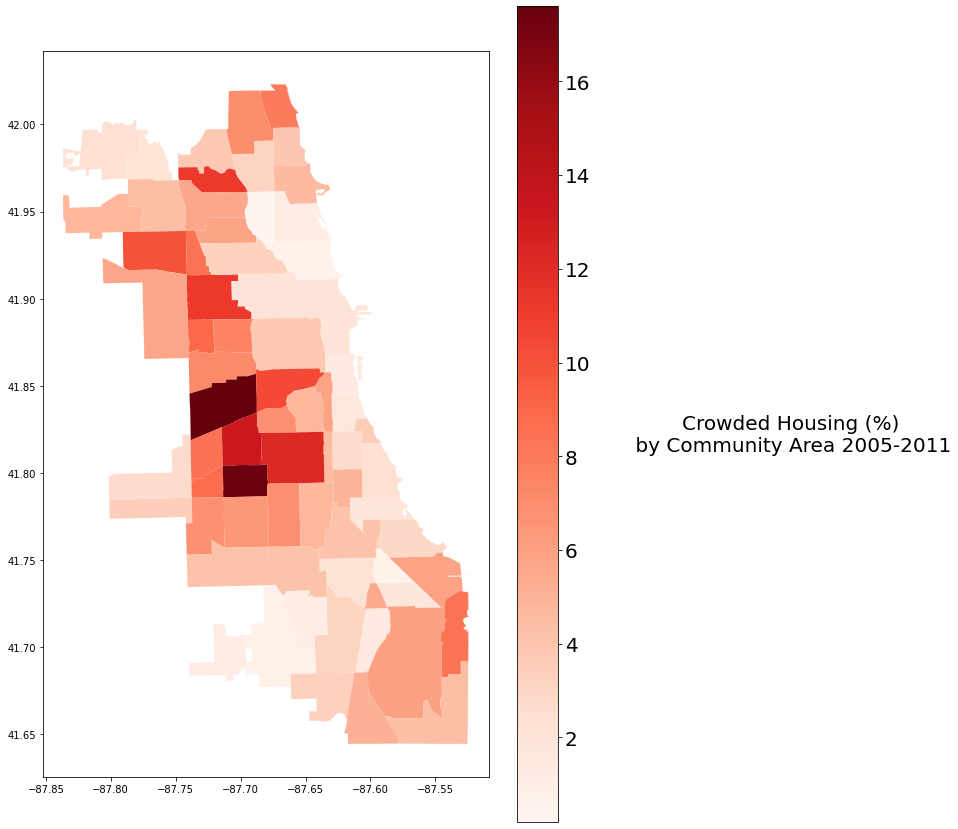

In [41]:
plt = merged.plot(column='Crowded Housing', legend=True, legend_kwds={'label': "Crowded Housing (%) by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Reds')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Crowded Housing (%)\n by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Cancer Map
Plot a heatmap of the community areas based on the cancer rate from 2005-2011

Text(635.0700000000002, 0.5, 'Cancer (per 100,000 persons)\n by Community Area 2005-2011')

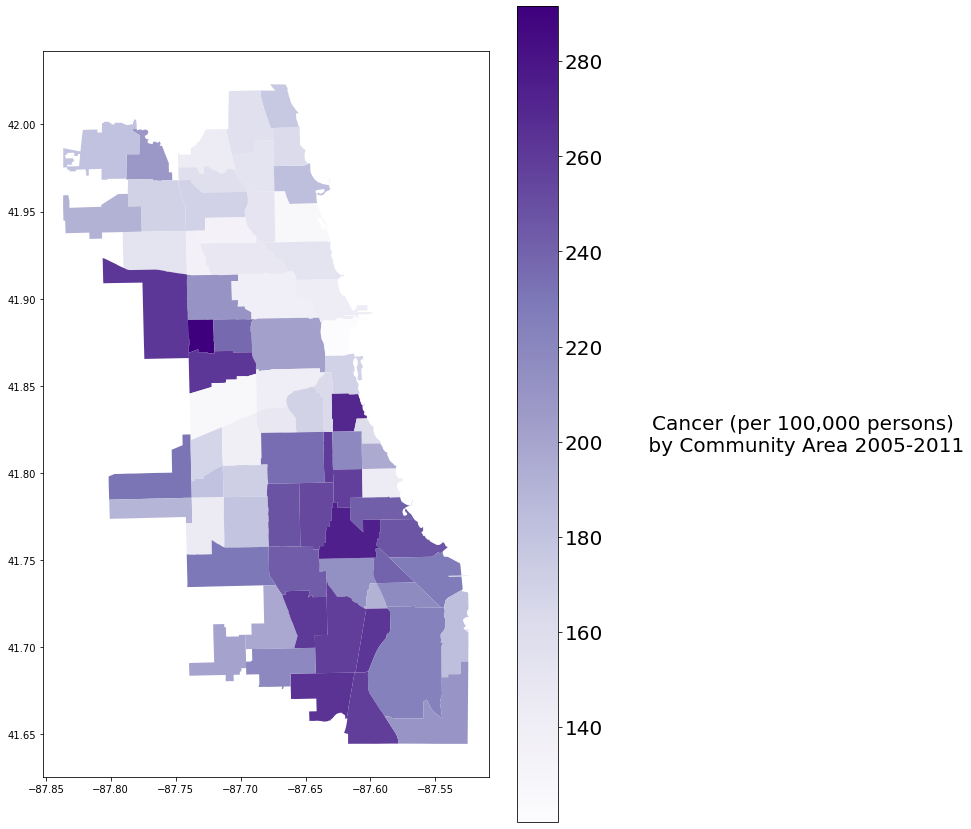

In [43]:
plt = merged.plot(column='Cancer (All Sites)', legend=True, legend_kwds={'label': "Cancer Deaths (per 100,000 persons) by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Purples')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Cancer Deaths (per 100,000 persons)\n by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Teen Birth Rate Map
Plot a heatmap of the community areas based on the teen birth rate from 2005-2011

Text(634.9450000000002, 0.5, 'Teen Birth Rate\n by Community Area 2005-2011')

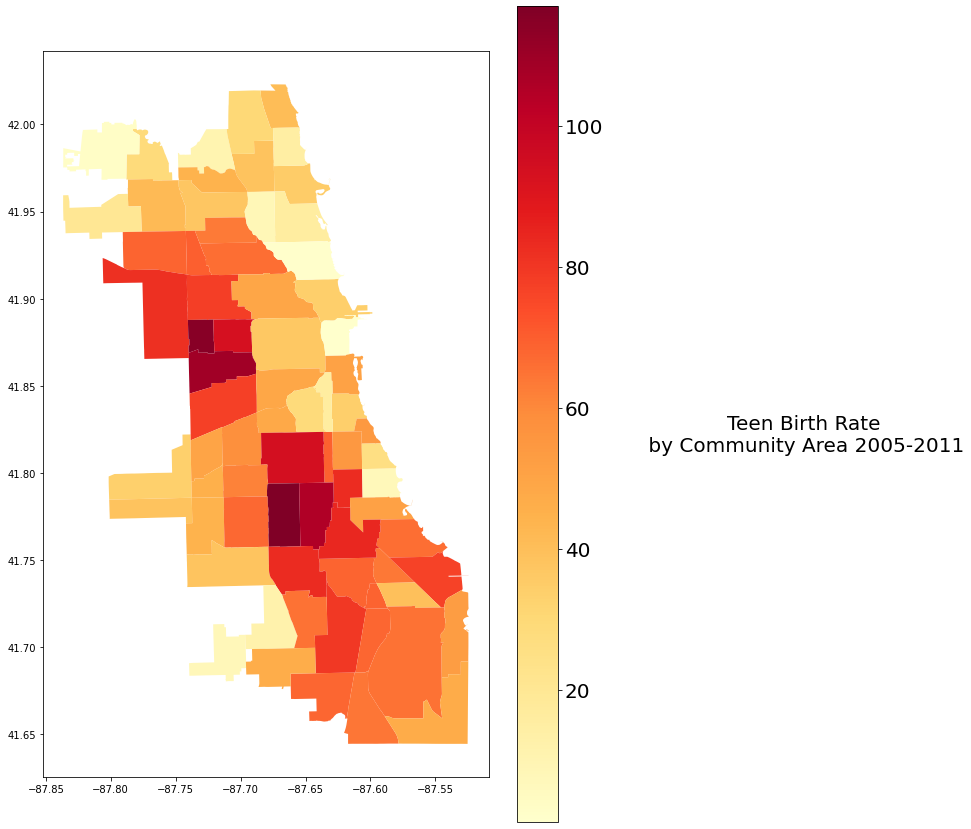

In [46]:
plt = merged.plot(column='Teen Birth Rate', legend=True, legend_kwds={'label': "Teen Birth Rate by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='YlOrRd')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Teen Birth Rate\n by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Diabetes-related Deaths Map
Plot a heatmap of the community areas based on the Diabetes-related deaths per 100,000 people from 2005-2011

Text(634.9450000000002, 0.5, 'Diabetes-related Deaths per 100,000\n people by Community Area 2005-2011')

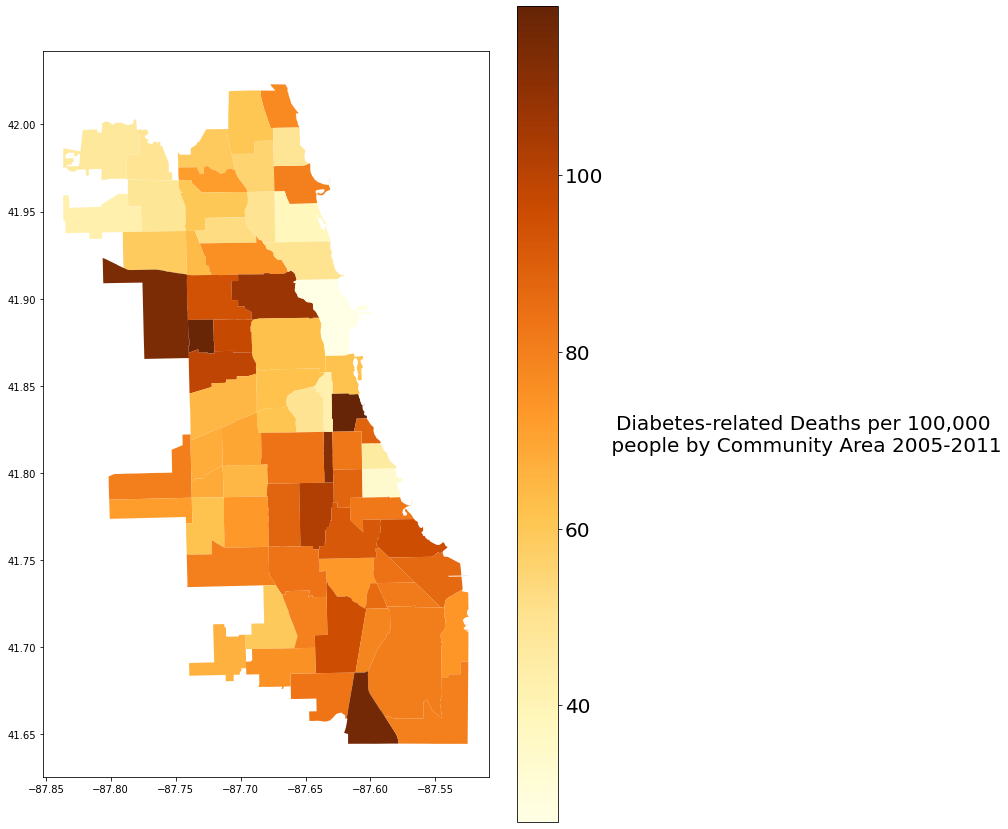

In [48]:
plt = merged.plot(column='Diabetes-related', legend=True, legend_kwds={'label': "Diabetes-related Deaths per 100,000 people by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='YlOrBr')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Diabetes-related Deaths per 100,000\n people by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Stroke Deaths Map
Plot a heatmap of the community areas based on the Stroke deaths per 100,000 people from 2005-2011

Text(628.6950000000002, 0.5, 'Stroke Deaths per 100,000\n people by Community Area 2005-2011')

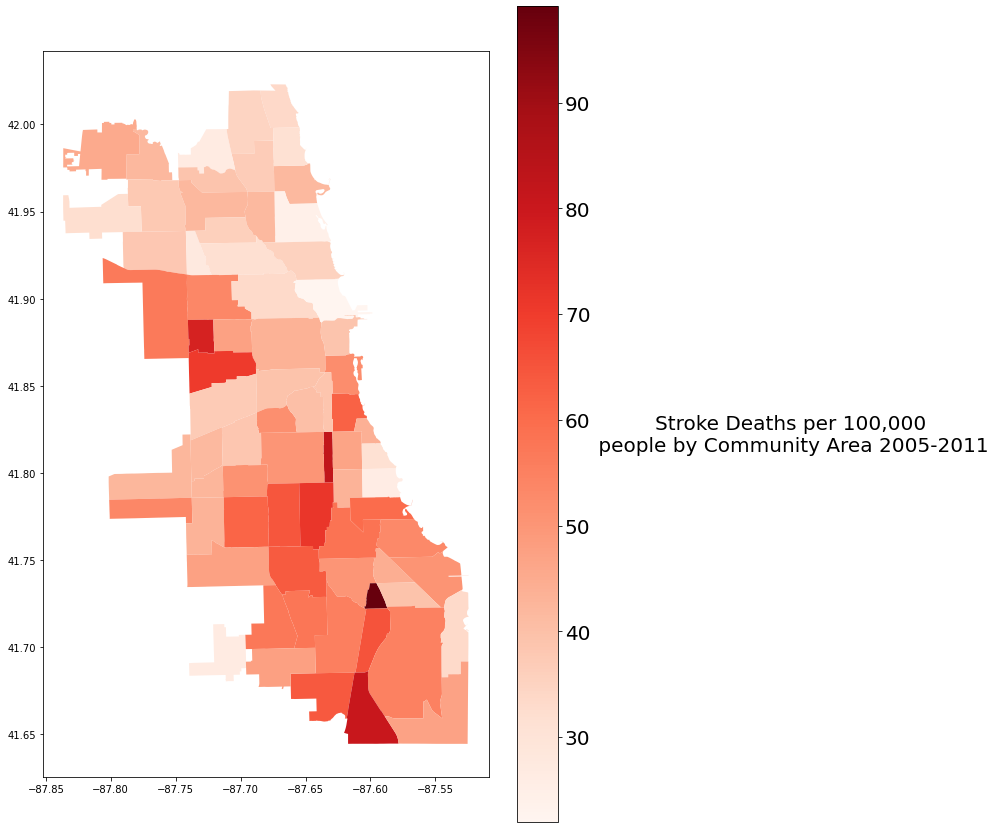

In [52]:
plt = merged.plot(column='Stroke (Cerebrovascular Disease)', legend=True, legend_kwds={'label': "Stroke Deaths per 100,000 people by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Reds')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Stroke Deaths per 100,000\n people by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Childhood Lead Poisoning Map
Plot a heatmap of the community areas based on the number of people with childhood lead poisoning per 100 people from 2005-2011

Text(632.0700000000002, 0.5, 'Childhood Lead Poisoning per 100\n people by Community Area 2005-2011')

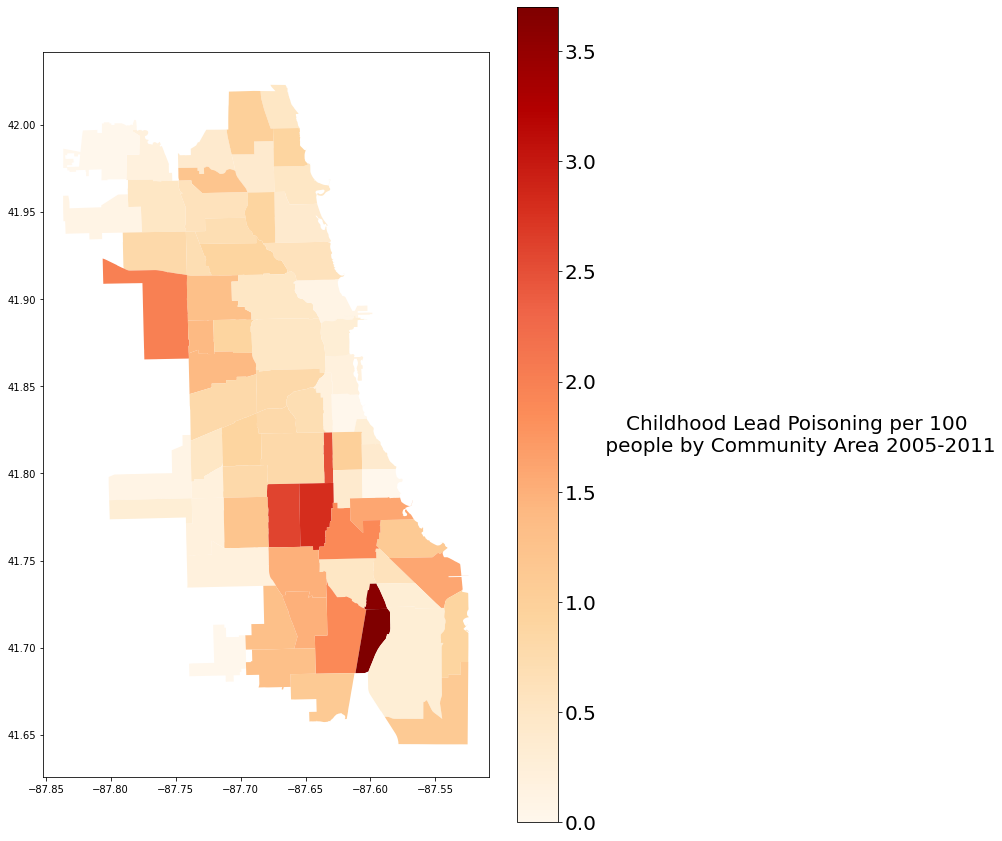

In [55]:
plt = merged.plot(column='Childhood Lead Poisoning', legend=True, legend_kwds={'label': "Childhood lead poisoning per 100 people by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='OrRd')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Childhood Lead Poisoning per 100\n people by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Childhood Blood Lead Level Screening Map
Plot a heatmap of the community areas based on the number of people that were screened in their childhood for their blood lead level per 1000 people from 2005-2011

Text(634.9450000000002, 0.5, 'Childhood Blood Lead Level Screening per 1000\n people by Community Area 2005-2011')

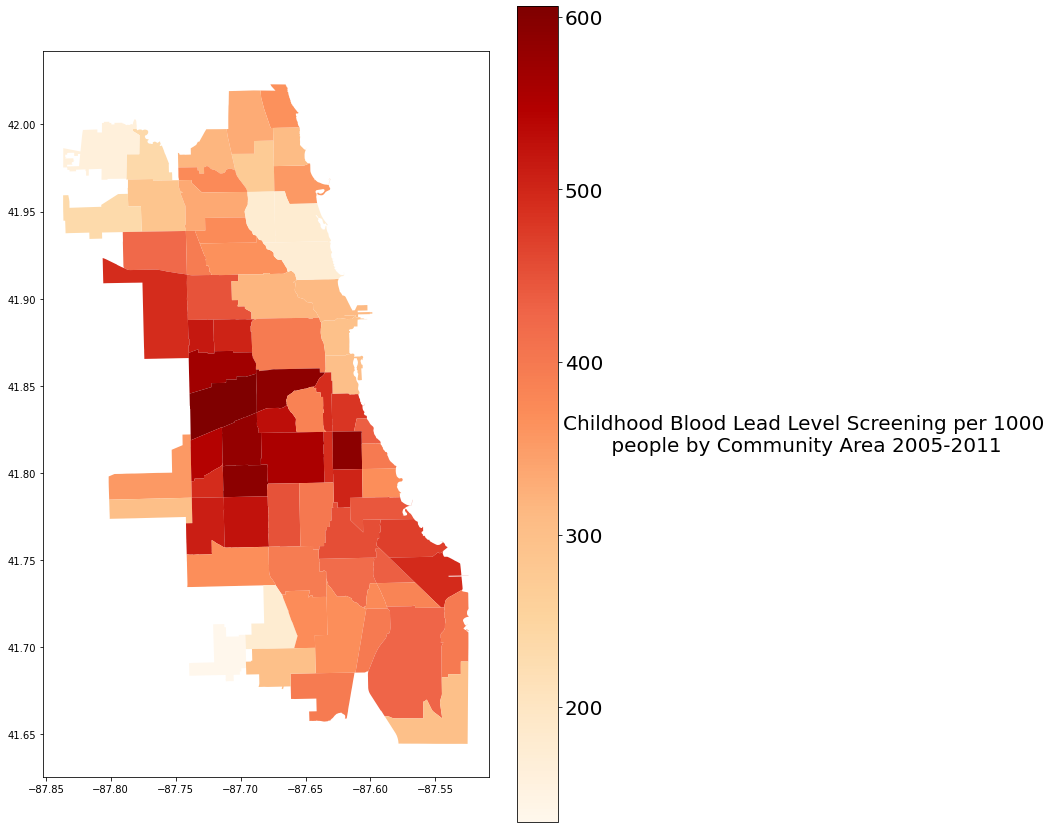

In [56]:
plt = merged.plot(column='Childhood Blood Lead Level Screening', legend=True, legend_kwds={'label': "Childhood Blood Lead Level Screening per 1000 people by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='OrRd')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Childhood Blood Lead Level Screening per 1000\n people by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Infant Mortality Rate Map
Plot a heatmap of the community areas based on the infant mortality rate per 1000 live births from 2005-2011

Text(638.4450000000002, 0.5, 'Infant Mortality Rate per 1000\n live births by Community Area 2005-2011')

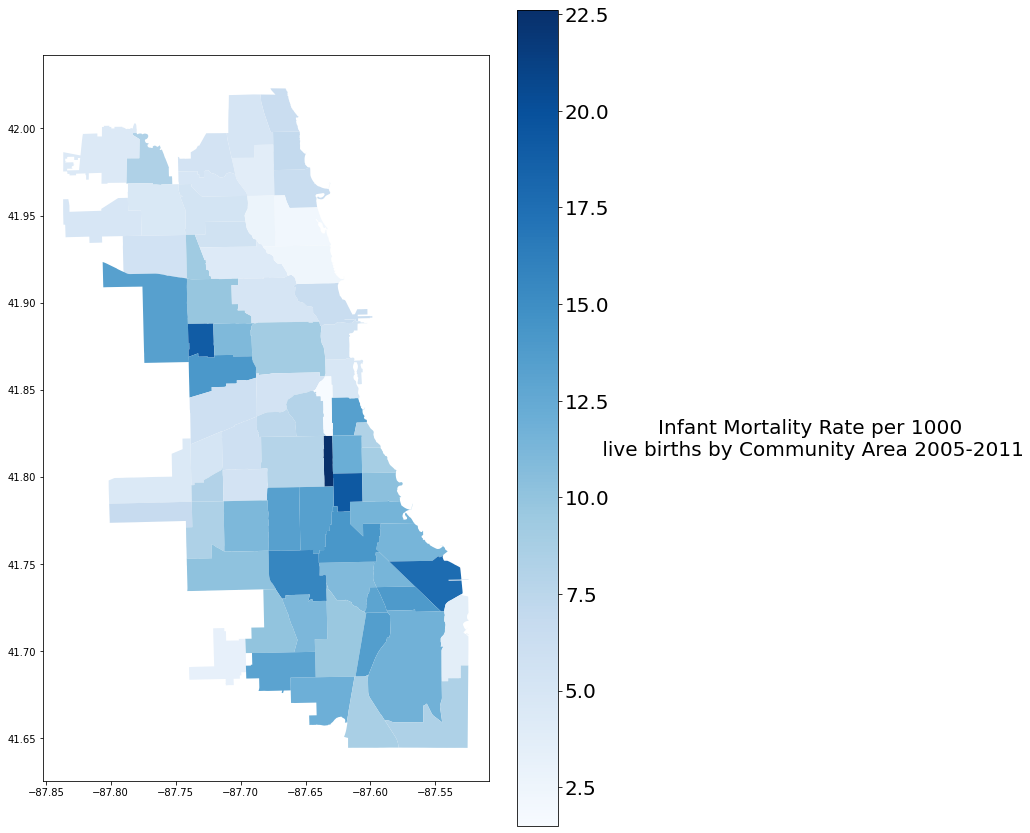

In [57]:
plt = merged.plot(column='Infant Mortality Rate', legend=True, legend_kwds={'label': "Infant Mortality Rate per 1000 live births by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Blues')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Infant Mortality Rate per 1000\n live births by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Prenatal Care Map
Plot a heatmap of the community areas based on the percent of females delivering a live birth that receive prenatal care beginning in the first trimester from 2005-2011

Text(628.8200000000002, 0.5, 'Prenatal Care Beginning in First\n Trimester by Community Area 2005-2011')

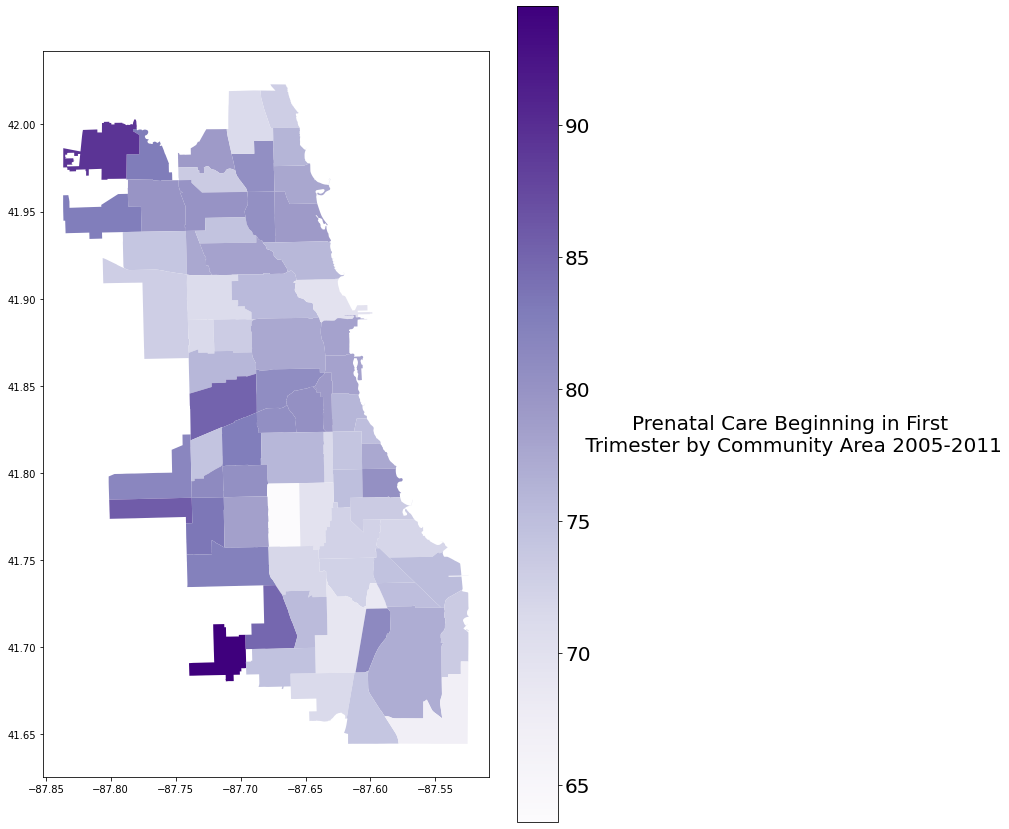

In [58]:
plt = merged.plot(column='Prenatal Care Beginning in First Trimester', legend=True, legend_kwds={'label': "Prenatal Care Beginning in First Trimester by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='Purples')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Prenatal Care Beginning in First\n Trimester by Community Area 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Preterm Births Map
Plot a heatmap of the community areas based on the percent of live births that are preterm births from 2005-2011

Text(628.8200000000002, 0.5, 'Preterm Births by Community Area\n 2005-2011')

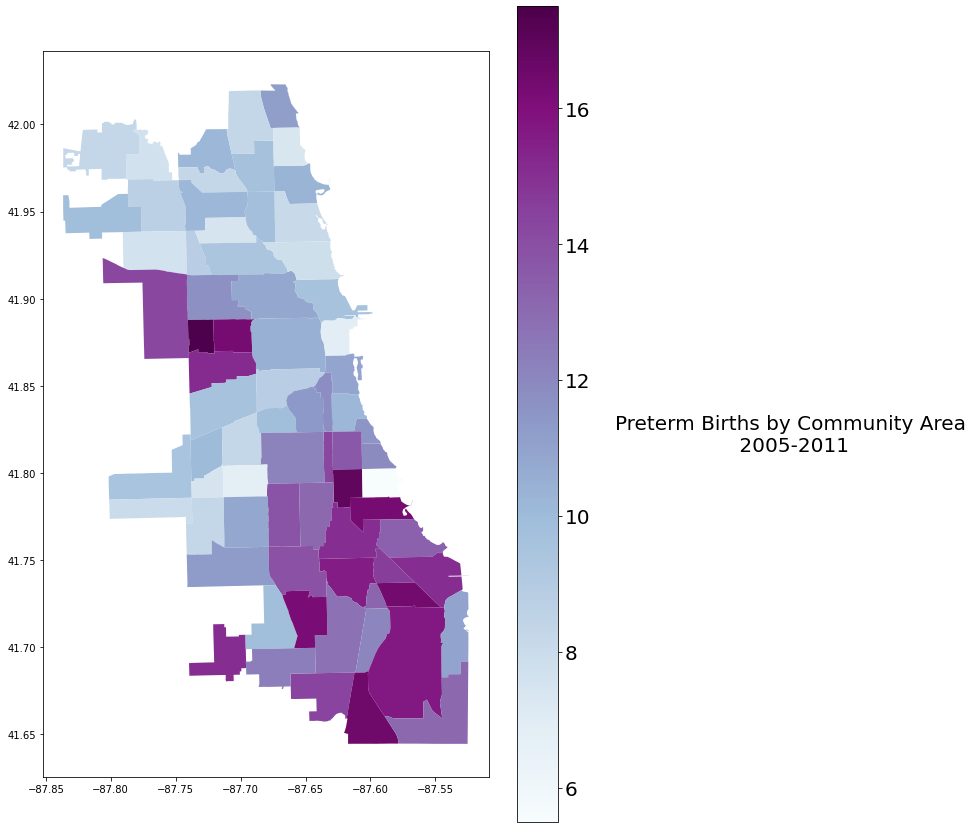

In [59]:
plt = merged.plot(column='Preterm Births', legend=True, legend_kwds={'label': "Preterm Births by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='BuPu')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Preterm Births by Community Area\n 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

### Task: Plot Birth Rate Map
Plot a heatmap of the community areas based on the birth rate from 2005-2011

Text(628.8200000000002, 0.5, 'Birth Rate by Community Area\n 2005-2011')

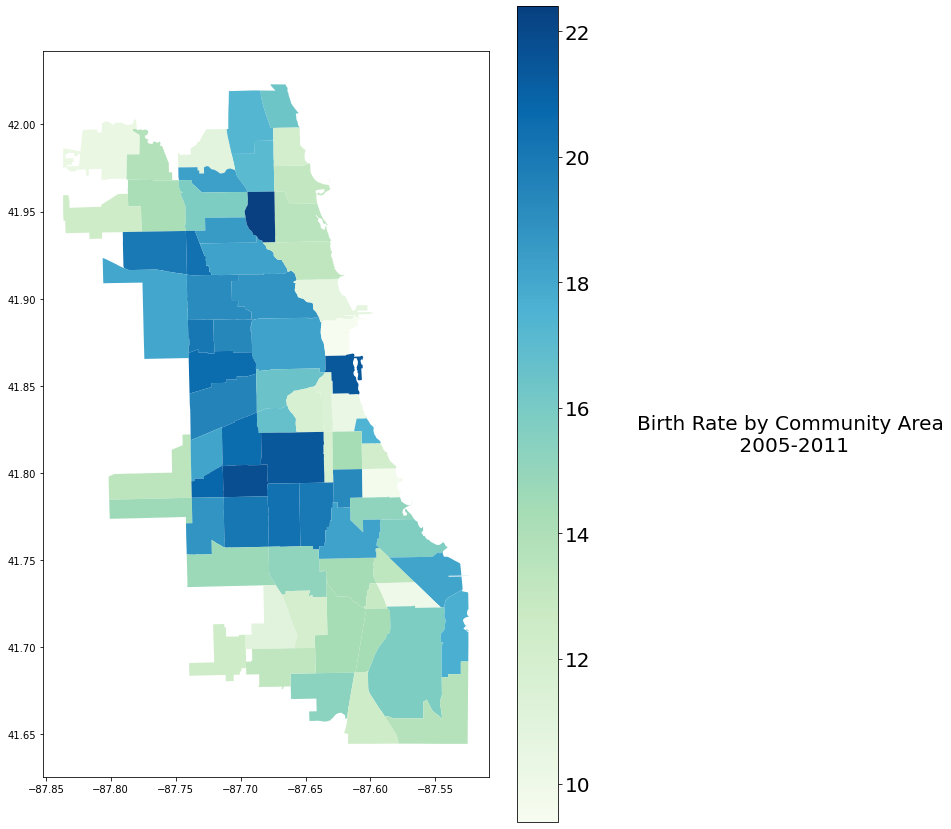

In [60]:
plt = merged.plot(column='Birth Rate', legend=True, legend_kwds={'label': "Birth Rate by Community Area 2005-2011",
                        'orientation': "vertical"}, figsize=(10,15), cmap='GnBu')
fig = plt.figure
cb_plt = fig.axes[1]
cb_plt.tick_params(labelsize=20, grid_markersize=20)
cb_plt.set_ylabel("Birth Rate by Community Area\n 2005-2011", fontsize=20, rotation=0, labelpad=200.0)

## b. Hypothesis Testing
[Back to Top](#Table-of-Contents)

### Task: 
Partition the data into low risk community areas and high risk community areas based on total shootings

In [18]:
# Dataframe containing community areas with high risk based on total shootings
high_risk_table = merged.loc[merged['Total Shootings'] >= 450]
num_high_risk = len(high_risk_table)
high_risk_table.describe()

,Total Shootings,Community Area,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,583.333333,52.555556,18.233333,80.644444,13.011111,71.566667,12.888889,85.811111,35.177778,33.166667,...,456.088889,1.688889,1759.755556,8.800000,29.155556,6.377778,40.466667,27.477778,14572.666667,19.811111
std,146.826428,18.628682,2.588436,9.855469,2.113909,4.204165,1.140663,16.871533,8.369405,7.295204,...,61.748693,0.686375,606.316277,2.356905,6.777004,3.324446,1.913113,9.136298,2698.610846,6.872853
min,463.000000,23.000000,14.300000,67.900000,9.400000,63.600000,10.800000,65.900000,22.400000,23.600000,...,369.500000,0.800000,1052.600000,5.300000,19.500000,2.900000,37.600000,14.900000,10559.000000,11.900000
25%,483.000000,43.000000,15.700000,70.500000,11.800000,69.700000,12.200000,77.900000,29.000000,26.300000,...,401.000000,1.200000,1234.700000,7.300000,24.500000,4.100000,39.000000,19.500000,12524.000000,17.400000
50%,544.000000,61.000000,19.200000,80.700000,12.300000,71.800000,13.100000,81.800000,34.400000,32.900000,...,450.600000,1.500000,1718.600000,9.300000,30.600000,5.700000,40.900000,29.400000,14405.000000,17.800000
75%,564.000000,67.000000,20.100000,85.800000,14.500000,72.900000,13.800000,94.300000,40.900000,39.200000,...,492.300000,2.000000,2032.200000,10.900000,32.300000,6.900000,42.000000,31.600000,16022.000000,21.300000
max,879.000000,71.000000,21.400000,93.400000,16.100000,78.400000,14.300000,116.900000,47.200000,43.500000,...,555.000000,2.800000,2762.200000,11.700000,42.200000,12.200000,43.400000,42.400000,18366.000000,34.700000


In [19]:
# Dateframe containing community areas with low risk based on total shootings
low_risk_table = merged.loc[merged['Total Shootings'] < 450]
num_low_risk = len(low_risk_table)
low_risk_table.describe()

,Total Shootings,Community Area,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Assault (Homicide),Breast cancer in females,...,Childhood Blood Lead Level Screening,Childhood Lead Poisoning,Gonorrhea in Females,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,...,63.000000,63.000000,56.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,114.140625,37.734375,15.476563,66.671875,9.896875,77.435938,11.167187,46.798438,16.51875,25.165625,...,387.042857,0.777778,755.194643,6.789062,19.790625,4.864063,35.250000,21.271875,26118.125000,12.776562
std,122.610736,21.845956,3.514087,15.432356,3.967486,4.959242,3.108976,25.259381,16.28425,9.607144,...,116.592279,0.727445,858.020600,4.811696,11.512832,3.710105,7.623293,12.631021,15630.908286,6.672920
min,1.000000,1.000000,9.400000,27.700000,4.500000,66.900000,5.500000,1.300000,0.70000,7.600000,...,133.600000,0.000000,50.300000,0.000000,3.100000,0.200000,15.500000,2.900000,8535.000000,4.200000
25%,20.000000,19.750000,12.500000,58.800000,7.200000,74.175000,8.600000,32.750000,4.80000,19.625000,...,309.900000,0.300000,127.925000,2.950000,11.950000,2.000000,31.450000,13.375000,15800.000000,7.800000
50%,63.500000,37.500000,14.900000,67.300000,8.450000,77.200000,10.250000,46.900000,10.30000,23.500000,...,383.200000,0.600000,233.500000,6.150000,17.150000,4.200000,37.750000,18.400000,22067.000000,11.200000
75%,175.500000,55.250000,18.225000,76.950000,12.475000,80.425000,13.850000,65.075000,24.35000,32.025000,...,486.050000,0.950000,1215.550000,9.325000,24.700000,6.825000,40.900000,28.225000,29684.250000,16.775000
max,421.000000,77.000000,22.400000,94.900000,19.700000,94.500000,17.500000,114.900000,70.30000,54.700000,...,605.900000,3.700000,3193.300000,22.700000,61.400000,17.600000,50.200000,58.700000,87163.000000,40.000000


### Task: 
Compute the mean per capita income for high risk and low risk community areas. Which one is higher? Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [20]:
# Sample Sizes:
#   - num_high_risk 
#   - num_low_risk

# Compute means
high_risk_income = high_risk_table['Per Capita Income']
low_risk_income = low_risk_table['Per Capita Income']
mean_income_high_risk = high_risk_income.mean()
mean_income_low_risk = low_risk_income.mean()

# Which is higher?
if (mean_income_low_risk > mean_income_high_risk):
    print("The mean per capita income in low risk community areas is higher by {}\n".format(mean_income_low_risk-mean_income_high_risk))
else:
    print("The mean per capita income in high risk community areas is higher by {}\n".format(mean_income_high_risk-mean_income_low_risk))
    
print("Low risk community areas mean per capita income: {}".format(mean_income_low_risk))
print("High risk community areas mean per capita income: {}\n".format(mean_income_high_risk))

# --- Hypothesis Test --- #
'''
Null Hypothesis:
  -> low_risk_income = high_risk_income
Alternative Hypothesis:
  -> low_risk_income != high_risk_income
'''
# Significance Level:
sig = 0.05

# Test Statistic and P-Value:
print("Two sample t-test: \n")
t_test_statistic = st.ttest_ind(low_risk_income, high_risk_income, equal_var = False)
print("t-test statistic & p-value: {}\n".format(t_test_statistic))

The mean per capita income in low risk community areas is higher by 11545.458333333334

Low risk community areas mean per capita income: 26118.125
High risk community areas mean per capita income: 14572.666666666666

Two sample t-test: 

t-test statistic & p-value: Ttest_indResult(statistic=5.367514023896507, pvalue=1.0305493131391116e-06)



#### Conclusions from Hypothesis Test
Since the p-value < the significance level of 0.05, we reject the null hypothesis. There exists sufficient evidence to assert that the difference between the mean per capita income for low risk community areas and high risk community areas is significant.

### Task: 
Compute the mean unemployement rate for high risk and low risk community areas. Which one is higher? Perform a hypothesis test to determine whether this difference is statistically significant at the 𝜶 = 𝟎. 𝟎𝟓 significance level. What is the result of the test? What conclusion do you make from this result?

In [21]:
# Sample Sizes:
#   - num_high_risk 
#   - num_low_risk

# Compute means
high_risk_unemployment = high_risk_table['Unemployment']
low_risk_unemployment = low_risk_table['Unemployment']
mean_unemployment_high_risk = high_risk_unemployment.mean()
mean_unemployment_low_risk = low_risk_unemployment.mean()

# Which is higher?
if (mean_unemployment_low_risk > mean_unemployment_high_risk):
    print("The mean unemployment in low risk community areas is higher by {}\n".format(mean_unemployment_low_risk-mean_unemployment_high_risk))
else:
    print("The mean unemployment in high risk community areas is higher by {}\n".format(mean_unemployment_high_risk-mean_unemployment_low_risk))
    
print("Low risk community areas mean unemployment: {}".format(mean_unemployment_low_risk))
print("High risk community areas mean unemployment: {}\n".format(mean_unemployment_high_risk))

# --- Hypothesis Test --- #
'''
Null Hypothesis:
  -> low_risk_unemployment = high_risk_unemployment
Alternative Hypothesis:
  -> low_risk_unemployment != high_risk_unemployment
'''
# Significance Level:
sig = 0.05

# Test Statistic and P-Value:
print("Two sample t-test: \n")
t_test_statistic = st.ttest_ind(low_risk_unemployment, high_risk_unemployment, equal_var = False)
print("t-test statistic & p-value: {}\n".format(t_test_statistic))

The mean unemployment in high risk community areas is higher by 7.034548611111115

Low risk community areas mean unemployment: 12.776562499999999
High risk community areas mean unemployment: 19.811111111111114

Two sample t-test: 

t-test statistic & p-value: Ttest_indResult(statistic=-2.8852892876464775, pvalue=0.015872104090210993)



#### Conclusions from Hypothesis Test
Since the p-value < the significance level of 0.05, we reject the null hypothesis. There exists sufficient evidence to assert that the difference between the mean unemployment for low risk community areas and high risk community areas is significant.

## c. Comparing Community Area Statistics
[Back to Top](#Table-of-Contents)

### Task: Compare Education
Compare low risk and high risk community areas based on education

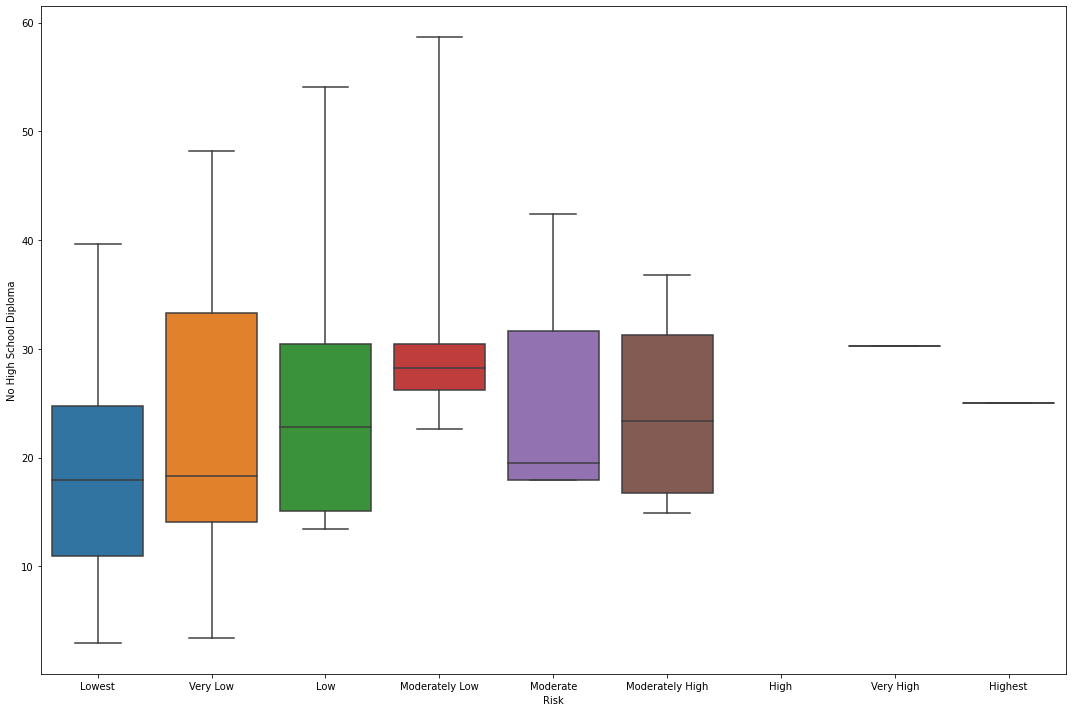

In [111]:
risk_order = ["Lowest", "Very Low", "Low", "Moderately Low", "Moderate", "Moderately High", "High", "Very High", "Highest"]

# Create boxplots to visualize No High School Diploma statistic
fig, axes = pplt.subplots(1, 1, figsize = (15, 10))
sns.boxplot(x = 'Risk', y = 'No High School Diploma', order = risk_order, data = merged, whis = 10, orient = 'v')
pplt.tight_layout()

In [112]:
tt = "Mean percent of people with high school diploma"
high_ed = high_risk_table["No High School Diploma"].mean()
low_ed = low_risk_table["No High School Diploma"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_ed, high_ed))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_ed/high_ed*100))

Mean percent of people with high school diploma
	Low Risk Community Areas      = 21.271874999999998
	High Risk Community Areas    = 27.477777777777778
	% Diff   = 77.41% change (low/high)



### Task: Compare Unemployment
Compare low risk and high risk community areas based on unemployment rate

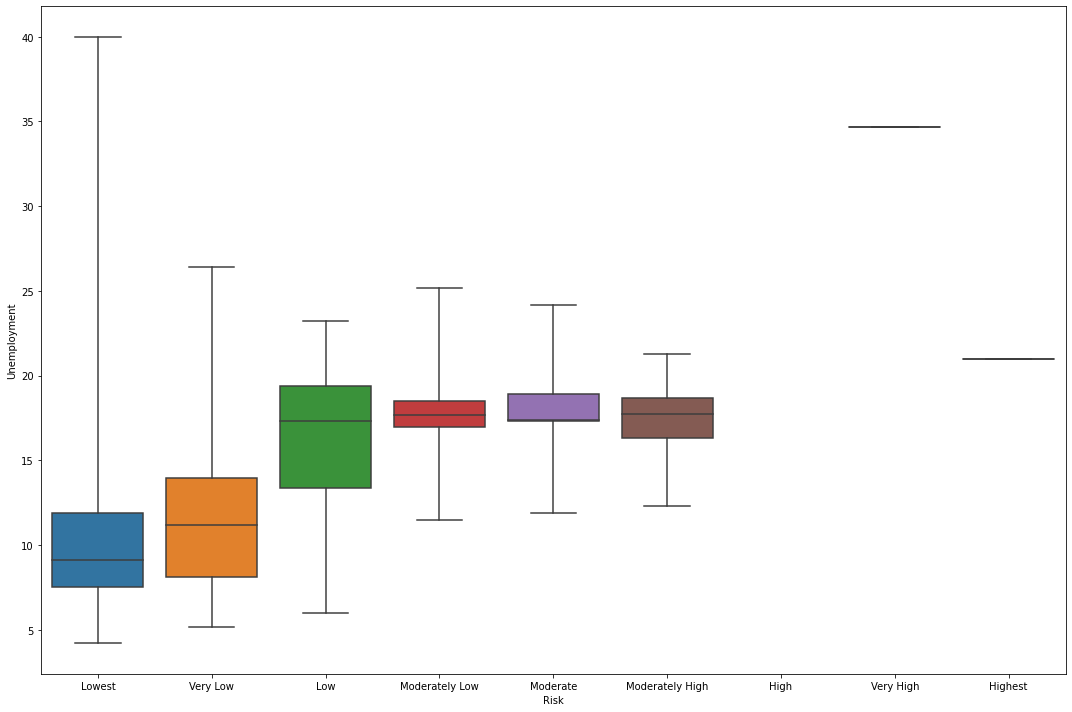

In [110]:
# Create boxplots to visualize unemployment statistic
fig, axes = pplt.subplots(1, 1, figsize = (15, 10))
sns.boxplot(x = 'Risk', y = 'Unemployment', order = risk_order, data = merged, whis = 10, orient = 'v')
pplt.tight_layout()

In [113]:
tt = "Mean Unemployment Rate"
high_une = high_risk_table["Unemployment"].mean()
low_une = low_risk_table["Unemployment"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_une, high_une))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_une/high_une*100))

Mean Unemployment Rate
	Low Risk Community Areas      = 12.776562499999999
	High Risk Community Areas    = 19.811111111111114
	% Diff   = 64.49% change (low/high)



### Task: Compare Income
Compare low risk and high risk community areas based on per capita income

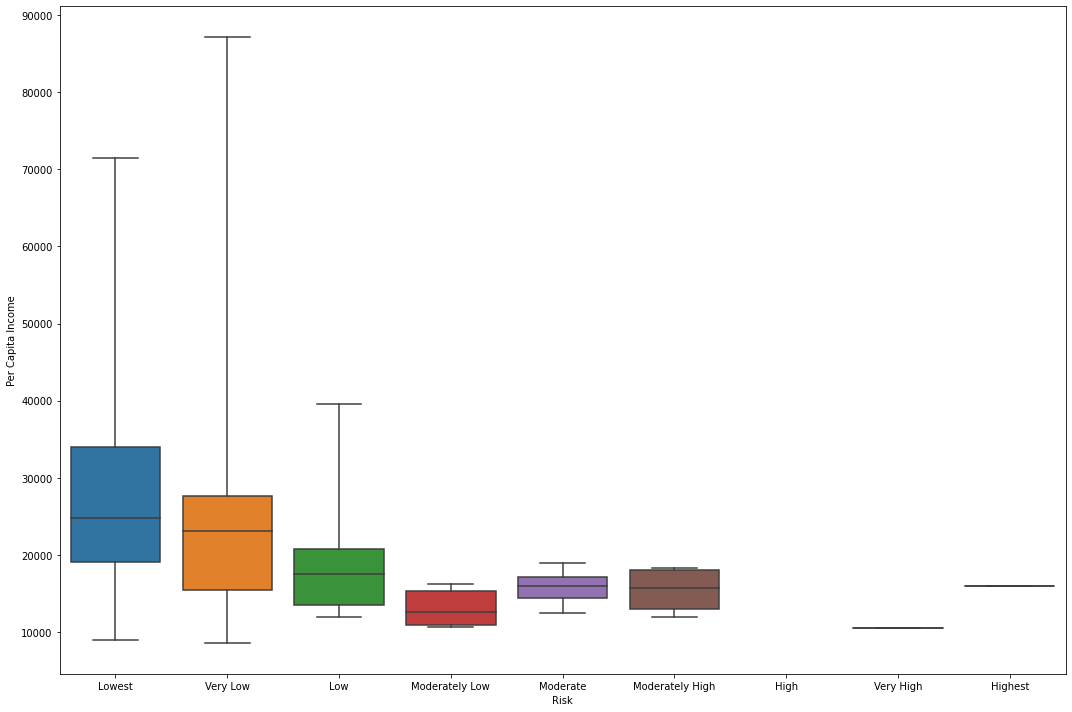

In [109]:
# Create boxplots to visualize No High School Diploma statistic
fig, axes = pplt.subplots(1, 1, figsize = (15, 10))
sns.boxplot(x = 'Risk', y = 'Per Capita Income', order = risk_order, data = merged, whis = 10, orient = 'v')
pplt.tight_layout()

In [114]:
tt = "Mean Per Capita Income"
high_inc = high_risk_table["Per Capita Income"].mean()
low_inc = low_risk_table["Per Capita Income"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_inc, high_inc))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_inc/high_inc*100))

Mean Per Capita Income
	Low Risk Community Areas      = 26118.125
	High Risk Community Areas    = 14572.666666666666
	% Diff   = 179.23% change (low/high)



### Task: Compare Natality Statistics
Compare the high and low risk community areas based on the natality statistics

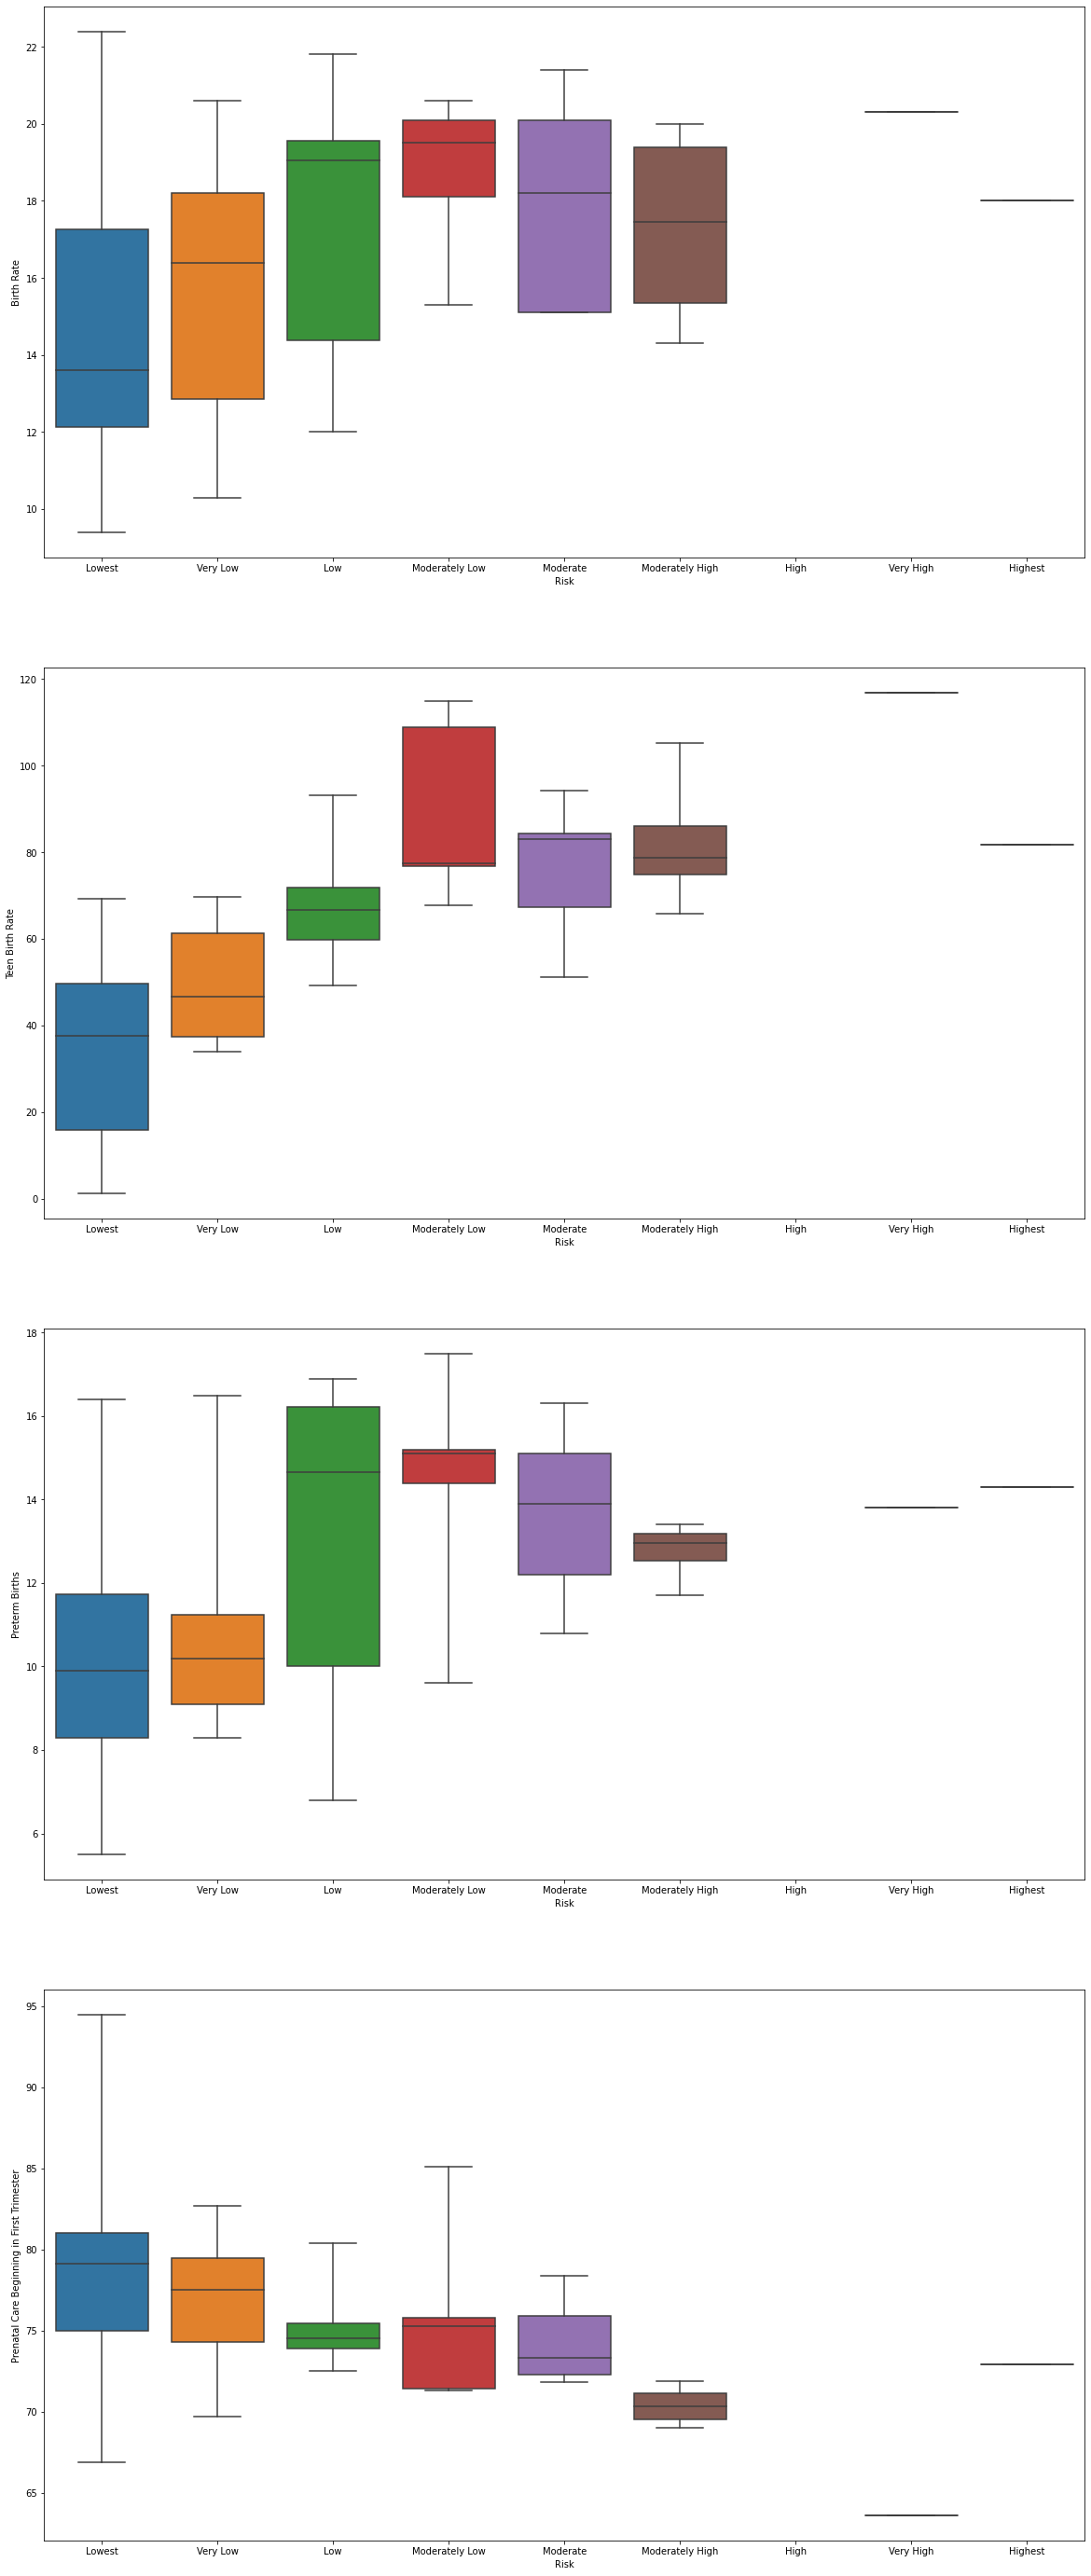

In [105]:
natality_stats = ["Birth Rate", "Teen Birth Rate", "Preterm Births", "Prenatal Care Beginning in First Trimester"]
num_columns = len(natality_stats)
fig, axes = pplt.subplots(num_columns, 1, figsize = (20, 50))
ax_counter = 0
for i in range(num_columns):
    sns.boxplot(x = 'Risk', y = natality_stats[i], order = risk_order, data = merged, whis = 10, orient = 'v', ax = axes[i]) 

In [115]:
tt = "Mean Birth Rate"
high_br = high_risk_table["Birth Rate"].mean()
low_br = low_risk_table["Birth Rate"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_br, high_br))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_br/high_br*100))

tt = "Mean Teen Birth Rate"
high_tbr = high_risk_table["Teen Birth Rate"].mean()
low_tbr = low_risk_table["Teen Birth Rate"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_tbr, high_tbr))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_tbr/high_tbr*100))

tt = "Mean Preterm Births"
high_pb = high_risk_table["Preterm Births"].mean()
low_pb = low_risk_table["Preterm Births"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_pb, high_pb))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_pb/high_pb*100))

tt = "Mean Prenatal Care"
high_pc = high_risk_table["Prenatal Care Beginning in First Trimester"].mean()
low_pc = low_risk_table["Prenatal Care Beginning in First Trimester"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_pc, high_pc))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_pc/high_pc*100))

Mean Birth Rate
	Low Risk Community Areas      = 15.476562500000002
	High Risk Community Areas    = 18.233333333333334
	% Diff   = 84.88% change (low/high)

Mean Teen Birth Rate
	Low Risk Community Areas      = 46.79843750000001
	High Risk Community Areas    = 85.8111111111111
	% Diff   = 54.54% change (low/high)

Mean Preterm Births
	Low Risk Community Areas      = 11.167187499999997
	High Risk Community Areas    = 12.88888888888889
	% Diff   = 86.64% change (low/high)

Mean Prenatal Care
	Low Risk Community Areas      = 77.43593750000001
	High Risk Community Areas    = 71.56666666666666
	% Diff   = 108.20% change (low/high)



### Task: Compare Mortality Statistics
Compare the high and low risk community areas based on the mortality statistics

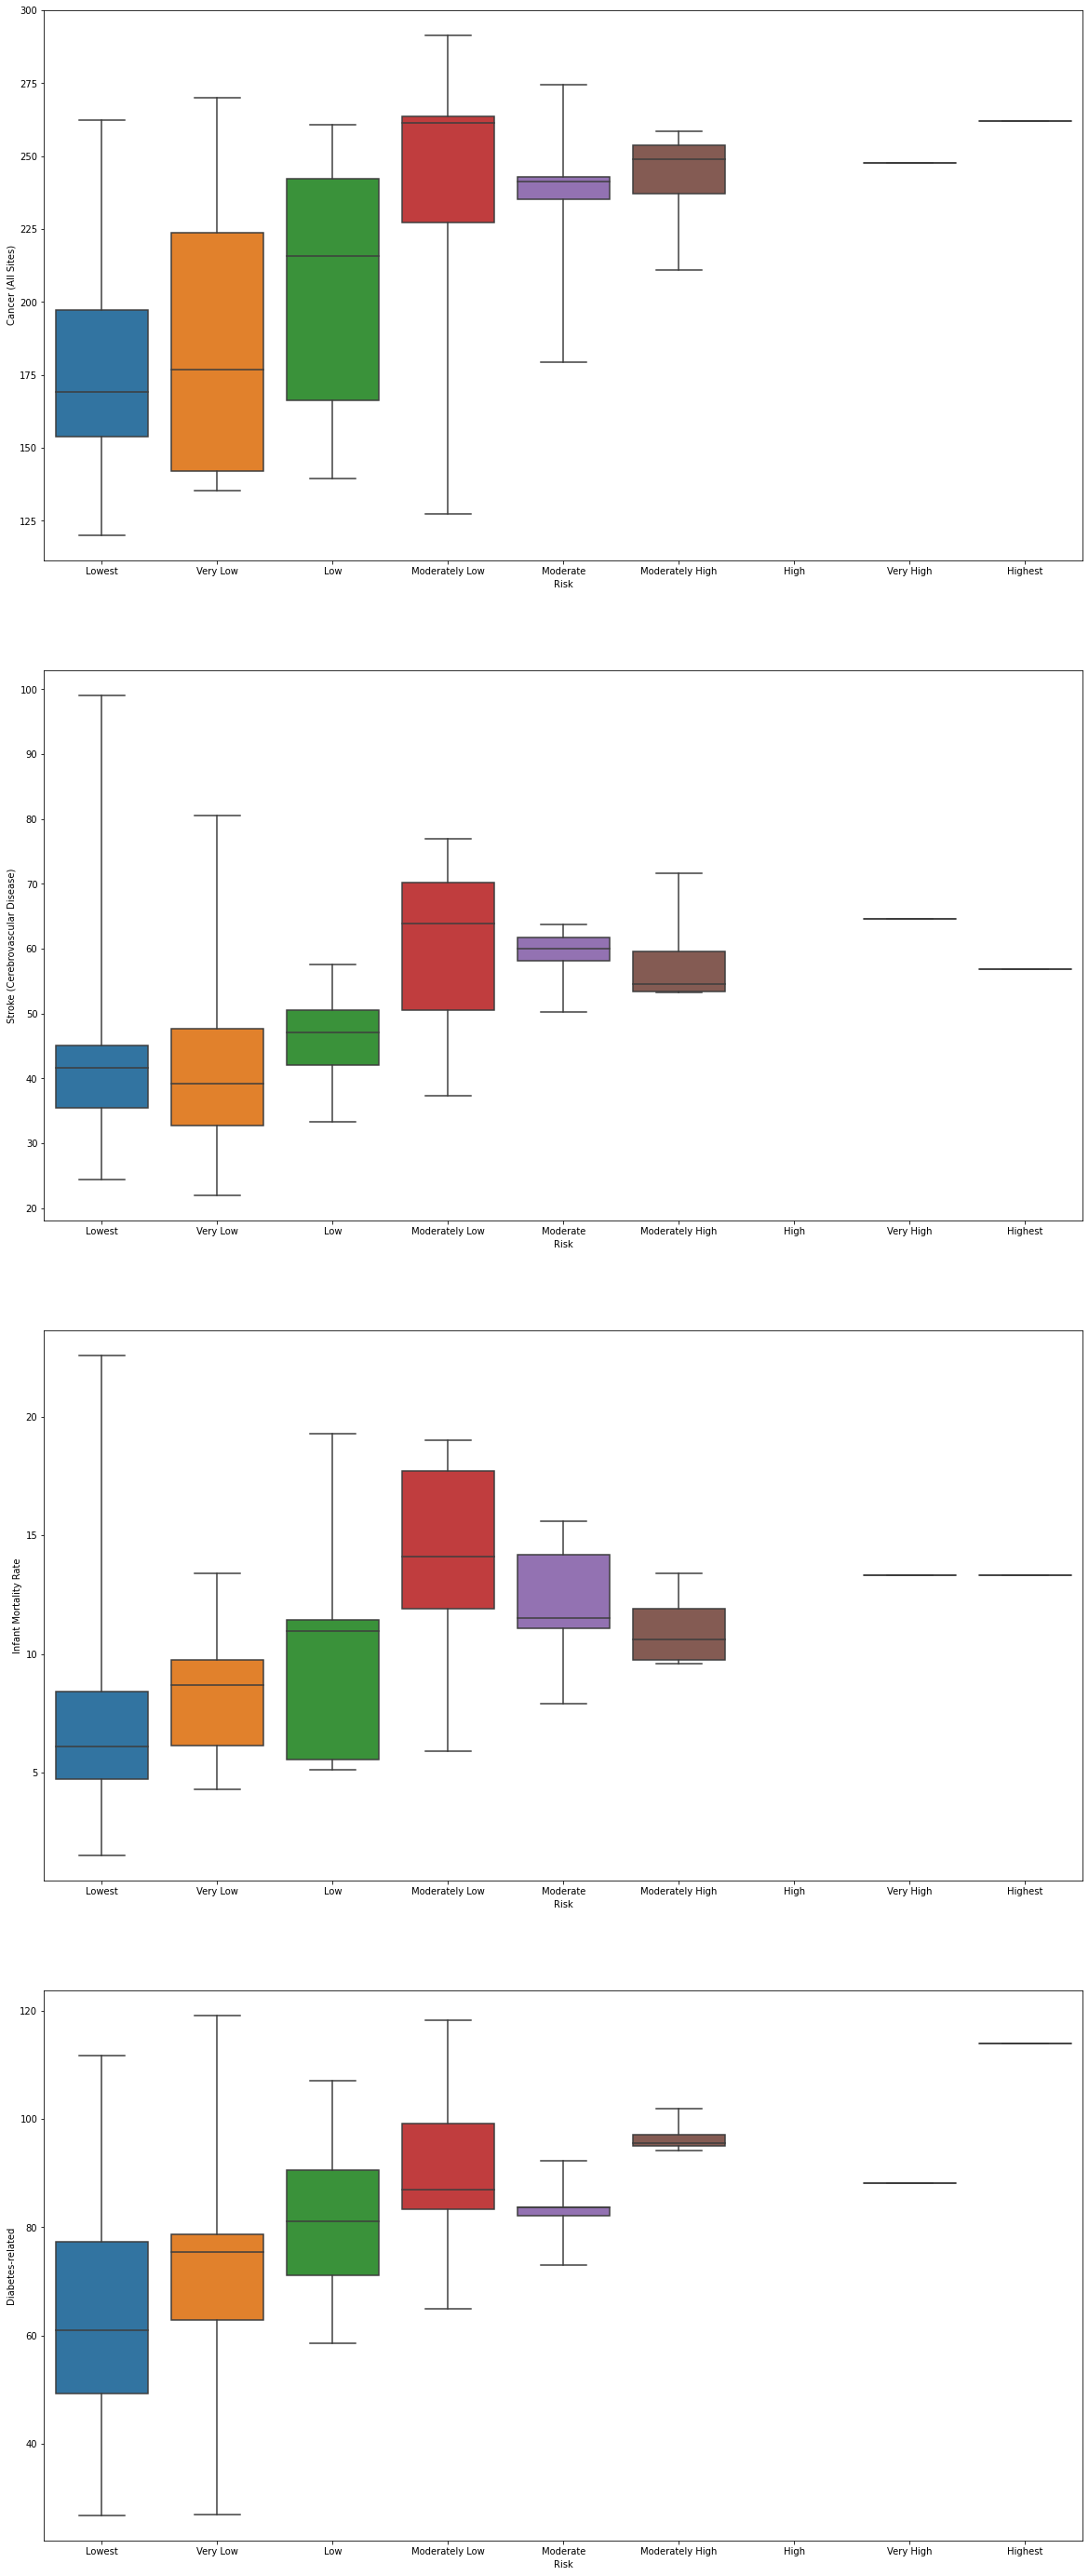

In [103]:
mortality_stats = ["Cancer (All Sites)", "Stroke (Cerebrovascular Disease)", "Infant Mortality Rate", "Diabetes-related"]
num_columns = len(mortality_stats)
fig, axes = pplt.subplots(num_columns, 1, figsize = (20, 50))
ax_counter = 0
for i in range(num_columns):
    sns.boxplot(x = 'Risk', y = mortality_stats[i], order = risk_order, data = merged, whis = 10, orient = 'v', ax = axes[i]) 

In [116]:
tt = "Mean Cancer-related Deaths"
high_can = high_risk_table["Cancer (All Sites)"].mean()
low_can = low_risk_table["Cancer (All Sites)"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_can, high_can))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_can/high_can*100))

tt = "Mean Stroke-related Deaths"
high_str = high_risk_table["Stroke (Cerebrovascular Disease)"].mean()
low_str = low_risk_table["Stroke (Cerebrovascular Disease)"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_str, high_str))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_str/high_str*100))

tt = "Mean Diabetes-related Deaths"
high_dia = high_risk_table["Diabetes-related"].mean()
low_dia = low_risk_table["Diabetes-related"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_dia, high_dia))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_dia/high_dia*100))

tt = "Mean Infant Mortality Rate"
high_imr = high_risk_table["Infant Mortality Rate"].mean()
low_imr = low_risk_table["Infant Mortality Rate"].mean()
print("{}\n\tLow Risk Community Areas      = {}\n\tHigh Risk Community Areas    = {}".format(tt, low_imr, high_imr))
print("\t% Diff   = {:0.2f}% change (low/high)\n".format(low_imr/high_imr*100))

Mean Cancer-related Deaths
	Low Risk Community Areas      = 190.72968749999998
	High Risk Community Areas    = 237.20000000000002
	% Diff   = 80.41% change (low/high)

Mean Stroke-related Deaths
	Low Risk Community Areas      = 45.34999999999999
	High Risk Community Areas    = 58.9888888888889
	% Diff   = 76.88% change (low/high)

Mean Diabetes-related Deaths
	Low Risk Community Areas      = 70.04531250000002
	High Risk Community Areas    = 92.13333333333333
	% Diff   = 76.03% change (low/high)

Mean Infant Mortality Rate
	Low Risk Community Areas      = 8.434374999999996
	High Risk Community Areas    = 11.711111111111112
	% Diff   = 72.02% change (low/high)



## d. Data Exploration Conclusions
[Back to Top](#Table-of-Contents)

### Question: Based on your results from the tasks above, which variables in the dataset do you think are more important to determine the risk label of a community area? Justify your answer.

// Answer Here

# III. Data Modeling

## a. Partitioning the Dataset

### Task:
Partition the merged dataset into a training set and a validation set using the holdout method or the cross-validation method. How did you partition the dataset?